# Basis function test

In [1]:
import sys
sys.path.append('../rt_erg_lib/')
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import jacobian

from basis import Basis
from gym.spaces import Box

from utils import convert_traj2ck

In [2]:
explr_space = Box(np.array([0., 0.]), np.array([1.0, 1.0]), dtype=np.float32)
basis = Basis(explr_space=explr_space, num_basis=4)

xt = [explr_space.sample() for _ in range(10)]

In [3]:
basis.k

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [0, 3],
       [1, 3],
       [2, 3],
       [3, 3]])

In [4]:
basis.fk(xt[0])

array([1.        , 0.98291879, 0.93225869, 0.84975037, 0.87500881,
       0.8600626 , 0.81573457, 0.74353907, 0.53128085, 0.52220593,
       0.49529119, 0.4514561 , 0.05474203, 0.05380697, 0.05103374,
       0.04651706])

In [5]:
basis.dfk(xt[0])

array([[ 0.        ,  0.        ],
       [-0.57817813,  0.        ],
       [-2.2732086 ,  0.        ],
       [-4.96860394,  0.        ],
       [ 0.        , -1.52086688],
       [-0.50591097, -1.49488863],
       [-1.98907759, -1.41784137],
       [-4.34757231, -1.29235721],
       [ 0.        , -5.32308778],
       [-0.307175  , -5.23216299],
       [-1.2077123 , -4.96249485],
       [-2.63972436, -4.52329587],
       [ 0.        , -9.41064575],
       [-0.0316507 , -9.24990053],
       [-0.12444026, -8.7731563 ],
       [-0.27199192, -7.99669981]])

In [6]:
k = basis.k[6]


In [7]:
np.prod(basis.dl * (2.0 * k * np.pi + np.sin(2.0 * k *np.pi)))

78.95683520871486

In [8]:
(16 * np.prod(k)*np.pi**2)

315.82734083485946

In [9]:
basis.hk

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.25, 0.25, 0.25, 1.  , 0.25, 0.25,
       0.25, 1.  , 0.25, 0.25, 0.25])

## This is how you would compute the cks

In [10]:
convert_traj2ck(basis, xt)

array([ 1.        , -0.18715062,  0.04651382, -0.0051779 ,  0.29957076,
       -0.15635735,  0.02879715,  0.30309226,  0.17032161,  0.01935388,
       -0.0548842 ,  0.07465715, -0.12467017,  0.02819816,  0.25347021,
       -0.02133668])

# Barrier Function Test

In [11]:
import autograd.numpy as np
from barrier import Barrier
from gym.spaces import Box

In [12]:
explr_space = Box(np.array([0., 0.]), np.array([1.0, 1.0]), dtype=np.float32)
barrier = Barrier(explr_space)

In [13]:
barrier.cost(explr_space.sample()-1)

46.12734317779541

In [14]:
barrier.dx(explr_space.sample()-1)

array([ -46.99380696, -145.47357559])

# Target Distribution test

In [15]:
from target_dist import TargetDist
from utils import convert_phi2phik, convert_phik2phi

# import again for independence between cells
import autograd.numpy as np
from basis import Basis
from gym.spaces import Box

import matplotlib.pyplot as plt

In [16]:
t_dist = TargetDist(num_nodes=5)

means:  [array([0.7, 0.7]), array([0.3, 0.3])]


In [17]:
xy, vals = t_dist.get_grid_spec()

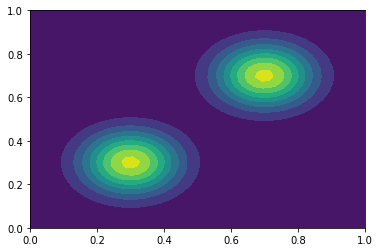

In [18]:
plt.contourf(*xy, vals, levels=10)

## Checking to see if the phiks can be computed from the phik class template

In [19]:
explr_space = Box(np.array([0., 0.]), np.array([1.0, 1.0]), dtype=np.float32)
basis = Basis(explr_space=explr_space, num_basis=10)

phik = convert_phi2phik(basis, t_dist.grid_vals, t_dist.grid)
print(phik)

[ 1.00000000e+00 -5.92552486e-19 -2.54807273e-01  5.74094050e-17
 -3.68471761e-01 -1.84543439e-16  1.36385912e-01  3.42910171e-17
  1.26585564e-02  9.01666043e-17 -1.13794112e-17  3.12567298e-01
  6.54055019e-17 -3.41833316e-01 -1.42199203e-16 -4.06392783e-04
 -3.91878205e-17  4.71002848e-02  1.32591891e-17 -6.26968106e-03
 -2.54807273e-01  1.47563674e-16  6.49267463e-02 -1.50648992e-16
  9.38892845e-02  4.79366120e-17 -3.47521224e-02  1.35827556e-17
 -3.22549222e-03 -2.59785534e-17  2.17061987e-16 -3.41833316e-01
 -1.53007026e-16  3.73839544e-01  9.69752139e-18  4.44443785e-04
  8.55225344e-17 -5.15103361e-02 -2.88187078e-18  6.85671816e-03
 -3.68471761e-01 -1.47881418e-16  9.38892845e-02 -9.06384016e-17
  1.35771439e-01  7.89176891e-17 -5.02543573e-02  2.07666009e-18
 -4.66432056e-03 -1.89041343e-17 -7.37210361e-17 -4.06392783e-04
  1.03325473e-16  4.44443785e-04  8.30980085e-17  5.28382513e-07
 -6.66175531e-18 -6.12387027e-05  4.70754442e-18  8.15169453e-06
  1.36385912e-01 -9.97970

In [20]:
phi = convert_phik2phi(basis, phik, t_dist.grid)

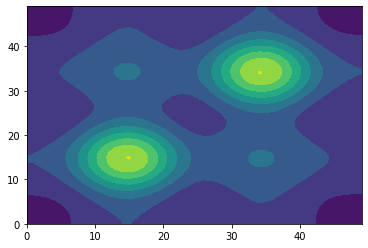

In [21]:
plt.contourf(phi.reshape(50,50))

In [22]:
np.min(phi)

0.27603096135575583

# Testing the ergodic controller 

In [2]:
from single_integrator import SingleIntegrator
from ergodic_control import RTErgodicControl
from target_dist import TargetDist
from utils import convert_phi2phik, convert_ck2dist, convert_traj2ck, convert_phik2phi
import autograd.numpy as np

from agent_base import Agent

import matplotlib.pyplot as plt

In [3]:
# env = SingleIntegrator()
# model = SingleIntegrator()
# t_dist = TargetDist(num_nodes=2)
# erg_ctrl = RTErgodicControl(model, t_dist, horizon=15, num_basis=10, batch_size=100)
agent = Agent()

means:  [array([0.7, 0.7]), array([0.3, 0.3])]


Checking to make sure that the phiks are set right

In [4]:
erg_ctrl.phik = convert_phi2phik(erg_ctrl.basis, t_dist.grid_vals, t_dist.grid)
erg_ctrl.phik

NameError: name 'erg_ctrl' is not defined

In [12]:
log = {'trajectory' : []}
state = agent.reset()
for t in range(600):
    state = agent.control_step()
    log['trajectory'].append(state)
print('doneee')

doneee


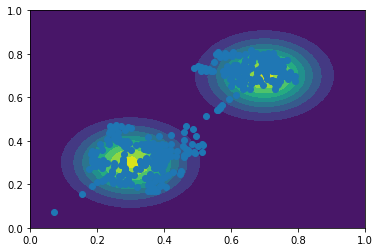

In [13]:
xy, vals = agent.t_dist.get_grid_spec()
plt.contourf(*xy, vals, levels=10)
xt = np.stack(log['trajectory'])

tf = 400
plt.scatter(xt[:tf,0], xt[:tf,1])

Trajectroy statistics are reconstructed

In [7]:
# path = [np.random.normal(0.2, 0.1,size=(2,)) for _ in range(50)] + [np.random.normal(0.7, 0.1,size=(2,))  for _ in range(50)]
path = np.stack(log['trajectory'])[:tf,model.explr_idx]
ck = convert_traj2ck(erg_ctrl.basis, path)
val = convert_ck2dist(erg_ctrl.basis, ck)

NameError: name 'model' is not defined

In [8]:
plt.contourf(*xy, val.reshape(50,50), levels=10)

NameError: name 'val' is not defined

Testing the $\phi_k$ reconstruction

In [30]:
phi = convert_phik2phi(erg_ctrl.basis, erg_ctrl.phik, t_dist.grid)

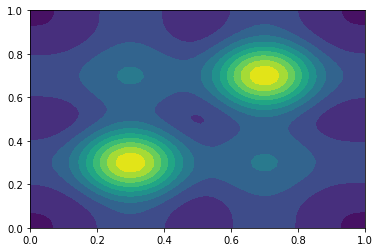

In [31]:
plt.contourf(*xy, phi.reshape(50,50), levels=10)

### In case you want to profile

In [31]:
%timeit erg_ctrl(state)

2.05 ms ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
